# Analysing the canteen of the University of Regensburg

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")
df.datum = df.datum.astype("datetime64[ns]")
# remove very old entries
df = df[df.datum > pd.Timestamp("2018-02-01")]
date_index = pd.DatetimeIndex(df.datum)
df.sample(5)

,datum,tag,warengruppe,name,kennz,stud,bed,gast
731,2018-10-01,Mo,HG1,Quarktaler mit Kirschgrütze (G),V,2.0,2.8,3.6
86,2018-07-03,Di,N3,"Chocolat de Coco (F,G)",V,1.1,1.4,1.6
277,2018-07-23,Mo,Suppe,"klare Gemüsebrühe mit Backerbsen (I,AA,C,G,8,3)",V,0.7,0.9,1.4
2732,2019-06-06,Do,N3,"Aprikosen Fromage (C,F,G)",V,1.1,1.4,1.6
2719,2019-06-05,Mi,B2,Bio-Curryreis,"B,VG",0.8,1.0,1.5


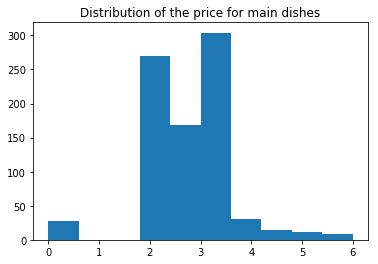

In [3]:
plt.title("Distribution of the price for main dishes")
main_dishes = df.warengruppe.str.startswith("HG")
plt.hist(df[main_dishes].stud);

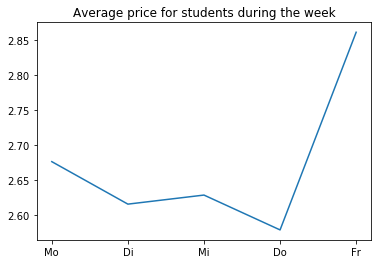

In [4]:
plt.title("Average price for students during the week")
days = ["Mo", "Di", "Mi", "Do", "Fr"]
mean_price = [df[main_dishes & (df.tag == d)].stud.mean() for d in days]
plt.plot(days, mean_price);

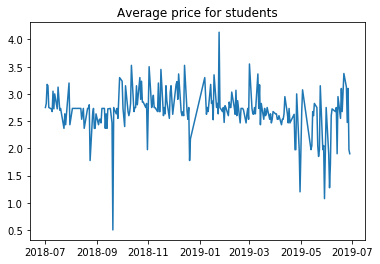

In [5]:
plt.title("Average price for students")
dates = df[main_dishes].datum.unique()
mean_price = [df[main_dishes & (df.datum == d)].stud.mean() for d in dates]
plt.plot(dates, mean_price);

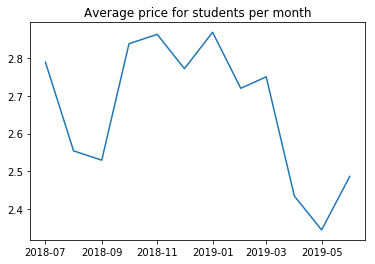

In [6]:
plt.title("Average price for students per month")
months = pd.DatetimeIndex(df.datum.apply(lambda d: pd.Timestamp(f"{d.year}-{d.month}")).unique())
mean_price = [df[main_dishes & (date_index.month == ts.month) & (date_index.year == ts.year)].stud.mean() for ts in months]
plt.plot(months, mean_price);

How often do we get certain dishes at uni?

In [7]:
def count_dishes(dish_names):
    if type(dish_names) != list:
        dish_names = [dish_names]
    plt.title(" ".join(dish_names))
    is_dish = df.name.str.lower().str.contains(dish_names[0])
    for d in dish_names:
        is_dish = is_dish | df.name.str.lower().str.contains(d)
    months = pd.DatetimeIndex(df.datum.apply(lambda d: pd.Timestamp(f"{d.year}-{d.month}")).unique())
    mean_price = [is_dish[(date_index.month == ts.month) & (date_index.year == ts.year)].sum() for ts in months]
    plt.plot(months, mean_price);

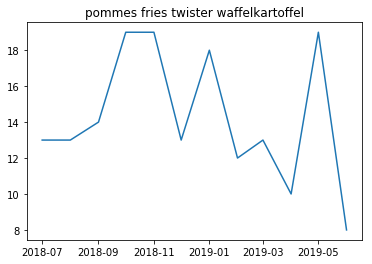

In [8]:
count_dishes(["pommes", "fries", "twister", "waffelkartoffel"])

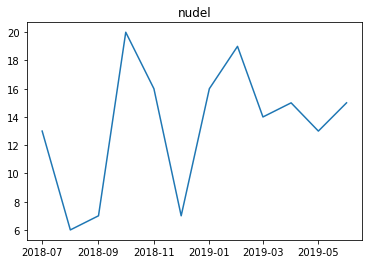

In [9]:
count_dishes("nudel")

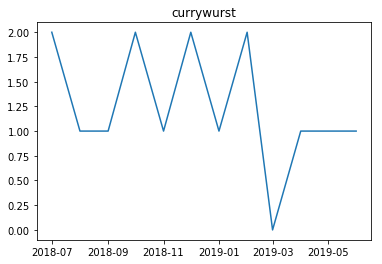

In [10]:
count_dishes("currywurst")